# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [2]:
%run ../tests/test_algorithms.py

C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\tests\test_algorithms.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
........
----------------------------------------------------------------------
Ran 8 tests in 0.094s

OK


In [52]:
%run ../tests/test_dataloader.py

......F........
FAIL: test_alternative_statistics (__main__.Testing)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\Max\Documents\GitHubPrivate\arguing-predictors\tests\test_dataloader.py", line 73, in test_alternative_statistics
    assert_frame_equal(stat_alternative, data_alt_stat)
  File "C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\pandas\_testing.py", line 1649, in assert_frame_equal
    raise_assert_detail(
  File "C:\Users\Max\Anaconda3\envs\sys\lib\site-packages\pandas\_testing.py", line 1073, in raise_assert_detail
    raise AssertionError(msg)
AssertionError: DataFrame are different

DataFrame shape mismatch
[left]:  (8, 5)
[right]: (8, 6)

----------------------------------------------------------------------
Ran 15 tests in 0.042s

FAILED (failures=1)


SystemExit: True

In [4]:
%run ../tests/test_predictors.py

.
----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


## Running example of the system

In [5]:
%run ../tools/algorithms.py

In [6]:
%run ../tools/dataloader.py

In [7]:
test = DataLoader('aapl', '2010-02-01', '2015-02-10')

In [8]:
prices = test.get_close()

In [9]:
prices = np.array(prices)
len(prices)

1266

In [10]:
prices

array([[ 6.95464277],
       [ 6.99499989],
       [ 7.11535692],
       ...,
       [29.73250008],
       [29.93000031],
       [30.50499916]])

In [11]:
%run ../tools/predictors.py

In [12]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)

In [13]:
op0.create_bilstm()

In [14]:
op0.model_blueprint()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 25, 100)           20800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 7)                 357       
Total params: 51,357
Trainable params: 51,357
Non-trainable params: 0
_________________________________________________________________


In [23]:
op0.fit_model(10)

Epoch 1/10
99/99 [==============================] - 2s 18ms/step - loss: 0.5048 - mean_squared_error: 0.5048 - val_loss: 29.3504 - val_mean_squared_error: 29.3504
Epoch 2/10
99/99 [==============================] - 2s 17ms/step - loss: 0.4986 - mean_squared_error: 0.4986 - val_loss: 22.9352 - val_mean_squared_error: 22.9352
Epoch 3/10
99/99 [==============================] - 2s 17ms/step - loss: 0.4627 - mean_squared_error: 0.4627 - val_loss: 27.5351 - val_mean_squared_error: 27.5351
Epoch 4/10
99/99 [==============================] - 2s 17ms/step - loss: 0.4625 - mean_squared_error: 0.4625 - val_loss: 14.7054 - val_mean_squared_error: 14.7054
Epoch 5/10
99/99 [==============================] - 2s 17ms/step - loss: 0.5149 - mean_squared_error: 0.5149 - val_loss: 17.8554 - val_mean_squared_error: 17.8554
Epoch 6/10
99/99 [==============================] - 2s 17ms/step - loss: 0.4711 - mean_squared_error: 0.4711 - val_loss: 20.6567 - val_mean_squared_error: 20.6567
Epoch 7/10
99/99 [====

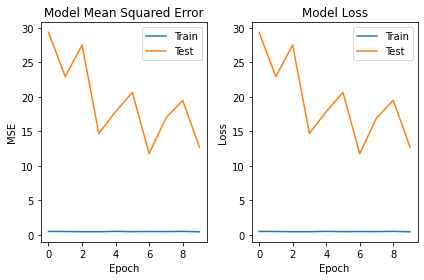

In [24]:
op0.show_performance()

In [25]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [26]:
nice = op0.predict(oyea)
nice

array([[25.435068, 21.3174  , 14.527286, 19.40212 , 15.113102, 13.038899,
        30.27563 ]], dtype=float32)

In [27]:
op1.create_lstm()

In [28]:
op1.model_blueprint()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 25, 40)            6720      
_________________________________________________________________
lstm_6 (LSTM)                (None, 25, 50)            18200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 357       
Total params: 45,477
Trainable params: 45,477
Non-trainable params: 0
_________________________________________________________________


In [29]:
op1.fit_model(10)

Epoch 1/10
99/99 [==============================] - 3s 31ms/step - loss: 62.6812 - mean_squared_error: 62.6812 - val_loss: 13.2584 - val_mean_squared_error: 13.2584
Epoch 2/10
99/99 [==============================] - 2s 24ms/step - loss: 2.0031 - mean_squared_error: 2.0031 - val_loss: 4.1727 - val_mean_squared_error: 4.1727
Epoch 3/10
99/99 [==============================] - 2s 24ms/step - loss: 1.9922 - mean_squared_error: 1.9922 - val_loss: 2.3702 - val_mean_squared_error: 2.3702
Epoch 4/10
99/99 [==============================] - 2s 24ms/step - loss: 1.7193 - mean_squared_error: 1.7193 - val_loss: 9.7352 - val_mean_squared_error: 9.7352
Epoch 5/10
99/99 [==============================] - 2s 20ms/step - loss: 1.4363 - mean_squared_error: 1.4363 - val_loss: 2.2997 - val_mean_squared_error: 2.2997
Epoch 6/10
99/99 [==============================] - 2s 23ms/step - loss: 1.3221 - mean_squared_error: 1.3221 - val_loss: 4.4972 - val_mean_squared_error: 4.4972
Epoch 7/10
99/99 [============

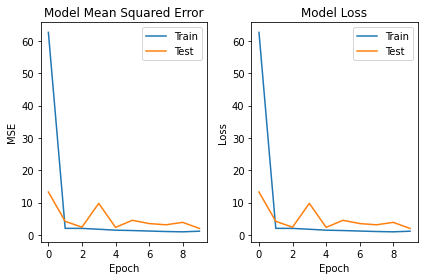

In [30]:
op1.show_performance()

In [31]:
nice = op1.predict(oyea)
nice

array([[29.503048, 28.488417, 26.49116 , 28.91937 , 27.625256, 24.42825 ,
        28.673407]], dtype=float32)

In [32]:
op2.create_cnn()

In [33]:
op2.model_blueprint()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 24, 64)            192       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 23, 32)            4128      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 352)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                17650     
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 357       
Total params: 22,327
Trainable params: 22,327
Non-trainable params: 0
__________________________________________________

In [34]:
op2.fit_model(10)

Epoch 1/10
99/99 [==============================] - 0s 3ms/step - loss: 27.1305 - mean_squared_error: 27.1305 - val_loss: 1.1040 - val_mean_squared_error: 1.1040
Epoch 2/10
99/99 [==============================] - 0s 2ms/step - loss: 1.0174 - mean_squared_error: 1.0174 - val_loss: 2.4678 - val_mean_squared_error: 2.4678
Epoch 3/10
99/99 [==============================] - 0s 2ms/step - loss: 0.9792 - mean_squared_error: 0.9792 - val_loss: 1.3138 - val_mean_squared_error: 1.3138
Epoch 4/10
99/99 [==============================] - 0s 2ms/step - loss: 1.0009 - mean_squared_error: 1.0009 - val_loss: 1.5532 - val_mean_squared_error: 1.5532
Epoch 5/10
99/99 [==============================] - 0s 2ms/step - loss: 1.0115 - mean_squared_error: 1.0115 - val_loss: 1.2337 - val_mean_squared_error: 1.2337
Epoch 6/10
99/99 [==============================] - 0s 2ms/step - loss: 0.9432 - mean_squared_error: 0.9432 - val_loss: 0.9067 - val_mean_squared_error: 0.9067
Epoch 7/10
99/99 [====================

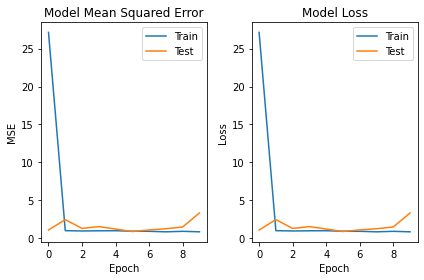

In [35]:
op2.show_performance()

In [36]:
nice = op2.predict(oyea)
nice

array([[27.433928, 27.087162, 27.345015, 27.394112, 27.296017, 27.271065,
        27.15245 ]], dtype=float32)

In [42]:
test = AlternativeDataLoader('AAPL', 'United States', '01/02/2010', '10/02/2010', 'stock')
test.get_data()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-02-01,6.87,7.00,6.83,6.95,749874432,USD
2010-02-02,7.00,7.01,6.91,6.99,698341952,USD
2010-02-03,6.97,7.15,6.94,7.12,615327680,USD
2010-02-04,7.03,7.08,6.84,6.86,757651776,USD
2010-02-05,6.88,7.00,6.82,6.98,850306240,USD
2010-02-08,6.99,7.07,6.93,6.93,478268960,USD
2010-02-09,7.01,7.05,6.96,7.01,632884736,USD
2010-02-10,7.00,7.02,6.94,6.97,370361248,USD


In [46]:
test2 = DataLoader('aapl', '2010-02-01', '2010-02-10')
test2.get_data()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-02-01,7.000000,6.832143,6.870357,6.954643,749876400,5.980317
2010-02-02,7.011429,6.906429,6.996786,6.995000,698342400,6.015021
2010-02-03,7.150000,6.943571,6.970357,7.115357,615328000,6.118517
2010-02-04,7.084643,6.841786,7.026071,6.858929,757652000,5.898012
2010-02-05,7.000000,6.816071,6.879643,6.980714,850306800,6.002738
2010-02-08,7.067143,6.928571,6.988929,6.932857,478270800,5.961581
2010-02-09,7.053571,6.955357,7.015000,7.006786,632886800,6.025155
2010-02-10,7.021429,6.937857,6.996071,6.968571,370361600,5.992293
